### Importing required libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Creating own dataset using mouse click bar

In [2]:
for y in dir(cv2):
    if 'EVENT' in y:
        print(y)

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP


In [8]:
dataset = []
def draw(event,x,y,flag,param):
    if event == cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),4,(255,0,0),3)
    elif event == cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),4,(0,255,0),3)

img = np.zeros((255,255,3),np.uint8)
cv2.namedWindow('window',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('window',draw)

while True:
    cv2.imshow('window',img)
    if cv2.waitKey(1) & 255 == ord('q'):
        break
cv2.destroyAllWindows()



### Displaying own dataset image

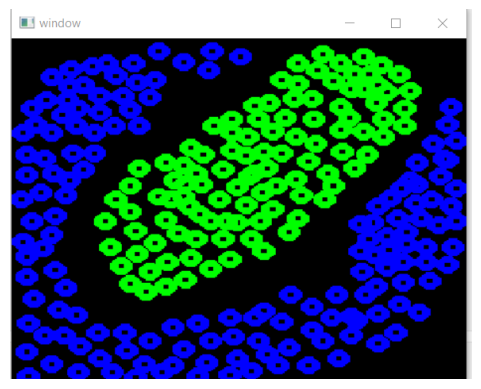

In [67]:
from PIL import Image

image_path = 'own_dataset_image.png' 
img = Image.open(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')
plt.show()

### Saving dataset as csv file

In [9]:
# Creating a dataframe
dataframe = pd.DataFrame(dataset)
# Saving as csv file 
dataframe.to_csv('own_dataset.csv', index=False)

In [10]:
df = pd.read_csv(r"own_dataset.csv")
df.head()

,0,1,2
0,208,59,1
1,204,47,1
2,210,39,1
3,205,34,1
4,197,37,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       255 non-null    int64
 1   1       255 non-null    int64
 2   2       255 non-null    int64
dtypes: int64(3)
memory usage: 6.1 KB


In [12]:
# Checking whether Target feature is balanced or not
df['2'].value_counts()

2
0    148
1    107
Name: count, dtype: int64

- Target feature is having minor imbalance. It won't effect the results

### Identifying Input and Output features

In [13]:
# Input features 
x = df.iloc[:,0:2]

# Output feature
y = df.iloc[:,2].astype(int)

### Splitting into train and test

In [17]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [18]:
x_train.shape

(216, 2)

In [19]:
x_test.shape

(39, 2)

### Standardizing numerical features

In [20]:
# As it is Numerical features in different scaling therefore applying Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

### Building Logical structure

In [21]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD

In [55]:
model = Sequential()
model.add(Dense(10,activation='tanh',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim = 2))
model.add(Dense(8,activation='tanh',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001))) 

**Observations:**
- As the data is not much complex, tanh activation function is used.
- Regularization is used as Lasso with 0.001 learning rate.
- As target variable contains binary class, In output layer sigmoid is used as activation function.

In [69]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                30        
                                                                 
 dense_20 (Dense)            (None, 8)                 88        
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the Model

In [56]:
model.compile(loss='binary_crossentropy',optimizer = SGD(learning_rate=0.1),metrics = ['accuracy'])
his = model.fit(x_trainp,y_train,batch_size=15,epochs = 20,validation_split=0.1)

Epoch 1/20
13/13 [==============================] - 1s 19ms/step - loss: 0.6771 - accuracy: 0.5979 - val_loss: 0.6771 - val_accuracy: 0.5000
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6388 - accuracy: 0.6495 - val_loss: 0.6775 - val_accuracy: 0.5909
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6126 - accuracy: 0.6495 - val_loss: 0.6523 - val_accuracy: 0.6364
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5912 - accuracy: 0.6856 - val_loss: 0.6307 - val_accuracy: 0.6364
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5684 - accuracy: 0.7062 - val_loss: 0.5769 - val_accuracy: 0.7727
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5506 - accuracy: 0.7320 - val_loss: 0.5735 - val_accuracy: 0.6818
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5158 - accuracy: 0.7577 - val_loss: 0.5474 - val_accuracy: 0.8182
Epoch 8/20
13/13 [=

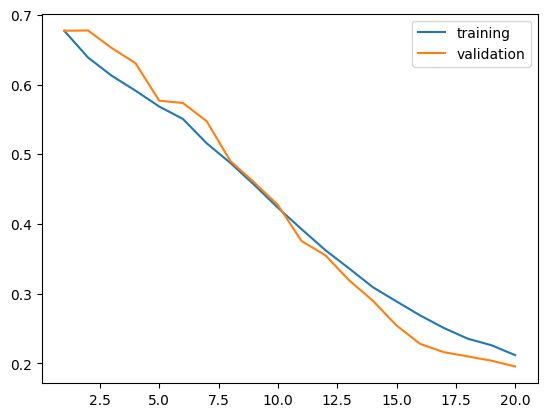

In [57]:
# Plotting train loss and Validation loss
plt.plot(range(1,21),his.history['loss'],label = 'training')
plt.plot(range(1,21),his.history['val_loss'],label = 'validation')
plt.legend()

## Predicting the model

In [61]:
predicted=model.predict(x_testp)
predicted=np.where(predicted>0.5,1,0)

2/2 [==============================] - 0s 4ms/step


## Evaluating the model 

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))  

0.9743589743589743


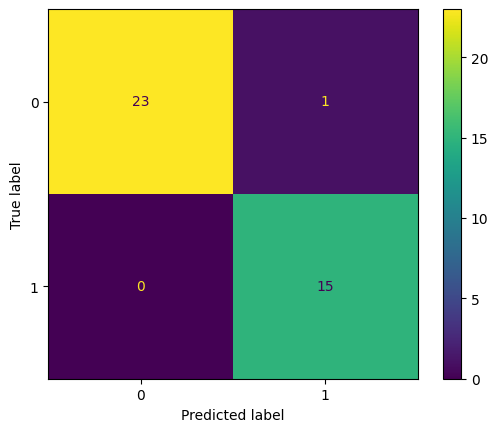

In [63]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

### PLOTING THE DECISION SURFACE 

In [64]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

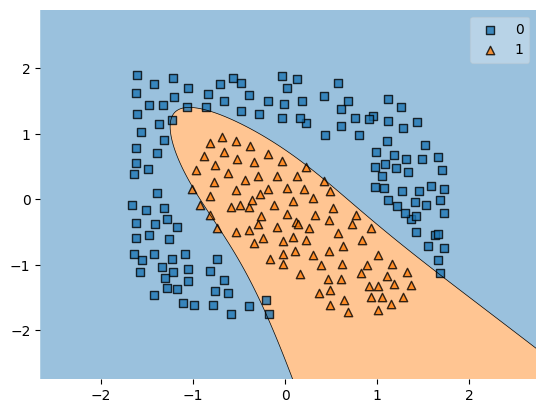

In [65]:
# Plotting decision Surface
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf = model)

9600/9600 [==============================] - 23s 2ms/step


<Axes: >

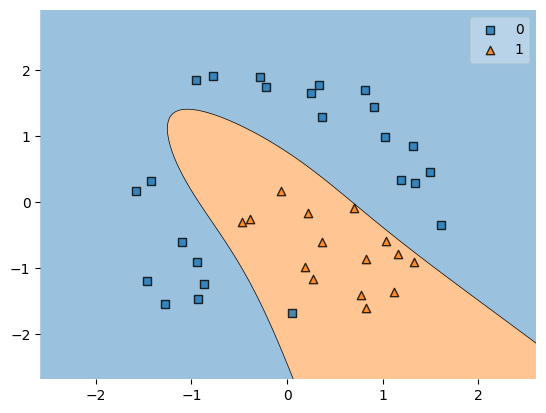

In [66]:
plot_decision_regions(x_testp,y_test.values,clf=model)  

## **Conclusions:**
- This neural network model achieves an accuracy of 97%.                      
#### The model architecture consists of 2 hidden layers as following:

- In the first hidden layer, there are 10 neurons with the tanh activation function 
- In the second hidden layer, there are 8 neurons with the tanh activation function 

- The output layer uses the sigmoid activation function.

#### In model compilation,
- Loss function is Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 15 and a learning rate of 0.001.
- The model was trained for 20 epochs.
 
#### Overall, this neural network model architecture and training configuration achieve an accuracy of 97%.  

